In [3]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [1]:
import os
import re
import pickle
import requests
import warnings
from tqdm import tqdm

c:\Users\mir96\anaconda3\Lib\site-packages\requests\__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.6) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud

In [8]:
pip install konlpy

   ---------------------------------------- 0.0/19.4 MB ? eta -:--:--
   - -------------------------------------- 0.5/19.4 MB 3.4 MB/s eta 0:00:06
   -- ------------------------------------- 1.3/19.4 MB 3.7 MB/s eta 0:00:05
   ---- ----------------------------------- 2.4/19.4 MB 4.1 MB/s eta 0:00:05
   -------- ------------------------------- 4.2/19.4 MB 5.5 MB/s eta 0:00:03
   ---------- ----------------------------- 5.2/19.4 MB 5.4 MB/s eta 0:00:03
   ------------ --------------------------- 6.0/19.4 MB 5.2 MB/s eta 0:00:03
   ------------- -------------------------- 6.6/19.4 MB 4.9 MB/s eta 0:00:03
   -------------- ------------------------- 7.1/19.4 MB 4.5 MB/s eta 0:00:03
   --------------- ------------------------ 7.3/19.4 MB 4.2 MB/s eta 0:00:03
   --------------- ------------------------ 7.6/19.4 MB 3.7 MB/s eta 0:00:04
   --------------- ------------------------ 7.6/19.4 MB 3.7 MB/s eta 0:00:04
   --------------- ------------------------ 7.6/19.4 MB 3.7 MB/s eta 0:00:04
   ---

In [9]:
from konlpy.tag import Okt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

In [10]:
warnings.filterwarnings('ignore', category=UserWarning)

# Seaborn 테마 설정
sns.set_theme(style='whitegrid')

# 한글 폰트 사용
font_path = "C:\Windows\Fonts\Hancom Gothic Bold.ttf"  # 경로 확인 후 변경 필요
font_prop = fm.FontProperties(fname=font_path)
plt.rc('font', family=font_prop.get_name())

<>:7: SyntaxWarning: invalid escape sequence '\W'
<>:7: SyntaxWarning: invalid escape sequence '\W'
C:\Users\mir96\AppData\Local\Temp\ipykernel_12172\3491805238.py:7: SyntaxWarning: invalid escape sequence '\W'
  font_path = "C:\Windows\Fonts\Hancom Gothic Bold.ttf"  # 경로 확인 후 변경 필요


In [42]:
df = pd.read_csv('mobile_game_content_df.csv').drop(columns='Unnamed: 0')
df_train = df.copy()

In [ ]:
# score점수 변경
## 1,2,3 이면 0
## 4,5 이면 1
df_train['label'] = [1 if score == 4 or score == 5 else 0 for score in df['score'].tolist()]

# 리뷰 글이 너무 조금 적혀있으면 이상치로 감안하고 제거
df_train['review'] = [None if len(str(review).split()) < 3 else review for review in df_train['review'].tolist()]
df_train = df_train.dropna()
df_train

,review_id,review_Name,review,score,thumbsUpCount,date,game_name,label
3,684c021f-7935-4f44-818a-8d173619c61d,Google 사용자,"검열이 싫어서 호모버스에서 넘어왔더니, 여기도 캐릭터 팔아놓고 스리슬쩍 검열질 ㅋㅋ...",1,1,2025-04-11,명조,0
5,b1a5b531-07db-4864-af17-5664164c6eea,Google 사용자,이야~이 스토리 진짜 재미있네요~ 불타오르기 시작한다!!!!,5,0,2025-04-10,명조,1
6,8fdcebde-d08f-4f37-a16b-098e9797d826,Google 사용자,"계정 사라짐, 현질 했던 계정인데.. 망겜",1,0,2025-04-10,명조,0
7,9e53403a-60c4-4f45-b29d-cb230458e313,Google 사용자,파수인 없는자들에게 파수인을 픽업 40뽑 확정으로 주라! 그리고 이게임 필수 4성 ...,4,9,2025-04-10,명조,1
8,36162b51-0d1c-4854-beab-baa11c8de0a7,Google 사용자,칸타렐라 검열 뭐임? 장난함? 팔만큼 다 팔았다 이거야?,1,14,2025-04-10,명조,0
...,...,...,...,...,...,...,...,...
620478,4cf1850b-5f30-4fe7-93ec-5a3280d05107,김태우,드디어 나오는군요~ 기대가 됩니다ㅎㅎ,5,7,2022-03-23,던전앤파이터 모바일,1
620480,eb9f6e9e-9c51-4157-b6a8-7567ed327456,MK B,정말 기대되네요. 코로나로 스트레스도 심한데 빨리 내일이 되서 액션쾌감과 함께 한 ...,5,69,2022-03-23,던전앤파이터 모바일,1
620481,322bd026-7eed-44b8-9da5-de3092361f38,브라이언,전설이 돌아온다 두근두근,5,2,2022-03-23,던전앤파이터 모바일,1
620483,46db163f-97fd-4991-86ea-e924f3f3b43b,배재근,일단 별5개 박고시작합니다 개발자님이 하셨던 말씀들 잘지켜주시길 부탁드립니다,5,12,2022-03-23,던전앤파이터 모바일,1


findfont: Font family 'Hancom Gothic' not found.
findfont: Font family 'Hancom Gothic' not found.
findfont: Font family 'Hancom Gothic' not found.
findfont: Font family 'Hancom Gothic' not found.
findfont: Font family 'Hancom Gothic' not found.


findfont: Font family 'Hancom Gothic' not found.
findfont: Font family 'Hancom Gothic' not found.
findfont: Font family 'Hancom Gothic' not found.
findfont: Font family 'Hancom Gothic' not found.
findfont: Font family 'Hancom Gothic' not found.
findfont: Font family 'Hancom Gothic' not found.
findfont: Font family 'Hancom Gothic' not found.
findfont: Font family 'Hancom Gothic' not found.
findfont: Font family 'Hancom Gothic' not found.
findfont: Font family 'Hancom Gothic' not found.
findfont: Font family 'Hancom Gothic' not found.
findfont: Font family 'Hancom Gothic' not found.
findfont: Font family 'Hancom Gothic' not found.
findfont: Font family 'Hancom Gothic' not found.
findfont: Font family 'Hancom Gothic' not found.
findfont: Font family 'Hancom Gothic' not found.
findfont: Font family 'Hancom Gothic' not found.
findfont: Font family 'Hancom Gothic' not found.
findfont: Font family 'Hancom Gothic' not found.
findfont: Font family 'Hancom Gothic' not found.
findfont: Font famil

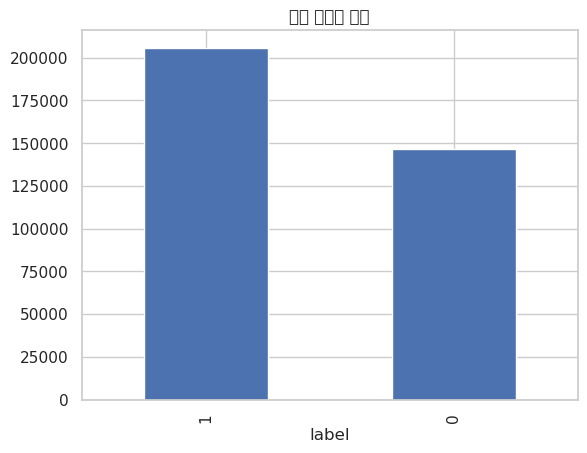

In [44]:
df_train['label'].value_counts().plot(kind='bar')
plt.title('감성 레이블 분포')
plt.show()

In [45]:
# 4. 한글과 공백만 남기기
df_train['review'] = df_train['review'].apply(lambda x: re.sub("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]", "", x))

In [46]:
df_train

,review_id,review_Name,review,score,thumbsUpCount,date,game_name,label
3,684c021f-7935-4f44-818a-8d173619c61d,Google 사용자,검열이 싫어서 호모버스에서 넘어왔더니 여기도 캐릭터 팔아놓고 스리슬쩍 검열질 ㅋㅋㅋ...,1,1,2025-04-11,명조,0
5,b1a5b531-07db-4864-af17-5664164c6eea,Google 사용자,이야이 스토리 진짜 재미있네요 불타오르기 시작한다,5,0,2025-04-10,명조,1
6,8fdcebde-d08f-4f37-a16b-098e9797d826,Google 사용자,계정 사라짐 현질 했던 계정인데 망겜,1,0,2025-04-10,명조,0
7,9e53403a-60c4-4f45-b29d-cb230458e313,Google 사용자,파수인 없는자들에게 파수인을 픽업 뽑 확정으로 주라 그리고 이게임 필수 성 무기들 ...,4,9,2025-04-10,명조,1
8,36162b51-0d1c-4854-beab-baa11c8de0a7,Google 사용자,칸타렐라 검열 뭐임 장난함 팔만큼 다 팔았다 이거야,1,14,2025-04-10,명조,0
...,...,...,...,...,...,...,...,...
620478,4cf1850b-5f30-4fe7-93ec-5a3280d05107,김태우,드디어 나오는군요 기대가 됩니다ㅎㅎ,5,7,2022-03-23,던전앤파이터 모바일,1
620480,eb9f6e9e-9c51-4157-b6a8-7567ed327456,MK B,정말 기대되네요 코로나로 스트레스도 심한데 빨리 내일이 되서 액션쾌감과 함께 한 방...,5,69,2022-03-23,던전앤파이터 모바일,1
620481,322bd026-7eed-44b8-9da5-de3092361f38,브라이언,전설이 돌아온다 두근두근,5,2,2022-03-23,던전앤파이터 모바일,1
620483,46db163f-97fd-4991-86ea-e924f3f3b43b,배재근,일단 별개 박고시작합니다 개발자님이 하셨던 말씀들 잘지켜주시길 부탁드립니다,5,12,2022-03-23,던전앤파이터 모바일,1


In [49]:
# 형태소 분석
okt = Okt()
X_train = []
y_train = []

# 진행 상황 표시와 함께 형태소 분석 수행
for sentence, label in tqdm(zip(df_train['review'], df_train['label']), total=len(df_train)):
  # 형태소 분리, 정규화, 어간 추출
  morphs = okt.morphs(sentence, stem=True, norm=True)
  X_train.append(morphs)
  y_train.append(label)

100%|██████████| 352287/352287 [2:39:20<00:00, 36.85it/s]  


In [ ]:
# response = requests.get("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt")
# with open("../data/ratings_train.txt", "wb") as f:
#   f.write(response.content)

df_train = pd.read_table("../data/ratings_train.txt")
df_train.info()

# 데이터 전처리
# 1. 중복 제거
print(f"중복 제거 전 고유 문서 수: {df_train['document'].nunique()}")
df_train = df_train.drop_duplicates(subset=['document'])
print(f"중복 제거 후 데이터 형태: {df_train.shape}")

# 2. 레이블 분포 확인
df_train['label'].value_counts().plot(kind='bar')
plt.title('감성 레이블 분포')
plt.show()

# 3. 결측치 제거
df_train = df_train.dropna(how='any')
print(f"결측치 수: {df_train.isnull().values.sum()}")

# 4. 한글과 공백만 남기기
df_train['document'] = df_train['document'].apply(lambda x: re.sub("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]", "", x))

# 5. 빈 문자열 처리       
empty_docs_count = df_train.loc[df_train['document'] == '', 'document'].count()
print(f"빈 문서 수: {empty_docs_count}")
df_train.replace({'document': {'': np.nan}}, inplace=True)
df_train = df_train.dropna(how='any')
print(f"최종 데이터 형태: {df_train.shape}")

# 형태소 분석
okt = Okt()
X_train = []
y_train = []

# 진행 상황 표시와 함께 형태소 분석 수행
for sentence, label in tqdm(zip(df_train['document'], df_train['label']), total=len(df_train)):
  # 형태소 분리, 정규화, 어간 추출
  morphs = okt.morphs(sentence, stem=True, norm=True)
  X_train.append(morphs)
  y_train.append(label)

# 데이터 저장
with open("../data/mining/X_train.pkl", "wb") as f:
  pickle.dump(X_train, f)

with open("../data/mining/y_train.pkl", "wb") as f:
  pickle.dump(y_train, f)

print("X_train.pkl 및 y_train.pkl 파일 저장 완료!")

In [50]:
# 데이터 저장
with open("../data/mining/X_train_game.pkl", "wb") as f:
  pickle.dump(X_train, f)

with open("../data/mining/y_train_game.pkl", "wb") as f:
  pickle.dump(y_train, f)

In [ ]:
# # 훈련된 모델 및 TF-IDF 벡터라이저 불러오기
# with open("../data/mining/X_train.pkl", "rb") as f:
#   X_train = pickle.load(f)

# with open("../data/mining/y_train.pkl", "rb") as f:
#   y_train = pickle.load(f)

In [53]:
df_test = pd.read_csv("../data/dnf_homepage_content.csv")

df_test = df_test.drop(columns = 'Unnamed: 0')

# 한글과 공백만 남기고 정제
df_test['content'] = df_test['content'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]", "", regex=True).str.strip()

# 빈 문자열 처리
df_test['content'] = df_test['content'].replace('', np.nan)

# 결측치 제거
df_test = df_test.dropna(subset=['content'])

In [54]:
# TF-IDF 벡터라이저 로드
tfidf_vectorizer = TfidfVectorizer()
X_train = [' '.join(words) for words in X_train]  # 리스트를 문자열로 변환
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)  # 훈련 데이터 변환

In [55]:
# 형태소 분석기 설정
okt = Okt()

# 형태소 분석 (토큰화 후 문자열로 변환) - 리스트 컴프리헨션 사용
X_test = [' '.join(okt.morphs(sentence, stem=True, norm=True)) for sentence in tqdm(df_test['content'])]

100%|██████████| 25977/25977 [09:41<00:00, 44.68it/s]   


In [56]:
# 데이터 저장
with open("../data/mining/X_test_df_community.pkl", "wb") as f:
  pickle.dump(X_test, f)

In [57]:
# 로지스틱 회귀 모델 로드
log_reg = LogisticRegression(max_iter=100000).fit(X_train_tfidf, y_train)

In [58]:
# 테스트 데이터 감정 분석 및 라벨 예측
X_test_tfidf = tfidf_vectorizer.transform(X_test)  # TF-IDF 변환
predicted_labels = log_reg.predict(X_test_tfidf)  # 감정 예측

In [59]:
# 예측된 감정 라벨을 데이터프레임에 추가
df_test['label'] = predicted_labels

In [60]:
# 결과 확인 및 CSV 저장
print(df_test[['content', 'label']].head(10))  # 상위 5개 데이터 확인
df_test.to_csv("../data/mining/labeled_test_data.csv", encoding='utf-8-sig', index=False)  # 결과 저장

                                             content  label
0  븜하 커뮤니티 오픈톡방 인원 모집 수다  정보공유  중천  나벨레이드 구인방 븜하 ...      1
1                    새로고침 누르면 딜이 낮아졌다 높아졌다하는데 왜이런건가요      0
2                                        나벨레이드 갱신 카드      0
3                   분홍색 큰거 하나만 먹으면 되는데내일 끝나면 없어지는건가요      0
4  안녕하세요복귀 일차 뉴비입니다현재 프로스트 패키지 개와 로얄패스를 구매하여 사용중인...      1
5                  제 캐릭들이 억에서 억 사이인데 베누스 단 클리어 할만할까용      1
6               또 레어만 잔뜩 나오겠누 ㅋㅋㅋㅋ레이드면 레어는 빼줘도 되는거아님      0
7  안녕하세요 뉴비인데 탈리스만 점핑으로주는거 끼고있는데 혹시 바꿔야하나요 바꾸면 뭐로...      1
8                 반지가 갈렸네 버프도 이제 자동으로 써주고 자동버프는 개꿀이네      1
9                   태거시가 양얼이랑 호위무신의 운검있는데 머 쓰는게 좋을까요      1


In [63]:
df_da = df_test[['content', 'label']]
tokenized_list = X_test.copy()
df_da['content_token'] = tokenized_list

C:\Users\mir96\AppData\Local\Temp\ipykernel_12172\719773821.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_da['content_token'] = tokenized_list


In [64]:
df_da[df_da['label'] == 1]['content'].tolist()

['븜하 커뮤니티 오픈톡방 인원 모집 수다  정보공유  중천  나벨레이드 구인방 븜하  ㅅ 오픈톡방 븜하 커뮤니티 인원 구합니다 구 븜하공대 버퍼교환  파티구인  수다  던파 정보 공유 오픈톡방 운영 중 든짱 컨셉러 매운맛 개그맨 프로아라드인 전업아라드인 차원 직장인월급루팡 밥똥던 나벨레이드 퍼스트 서버 공팟 구인쩔러공팟고정팟 구하시는분 환영 개성 넘치는 분들 환영 뉴비 새내기 분들도 환영 븜하 커뮤니티 오픈톡방 인원 모집  길드   수다 정보공유 버퍼교환 친목  오픈톡 븜하 검색 오픈톡방 검색어  븜하 검색  비번문의방 링크',
 '안녕하세요복귀 일차 뉴비입니다현재 프로스트 패키지 개와 로얄패스를 구매하여 사용중인데본캐에 받으면 좋은게프로스트에선 칭호를 로얄패스에선 크리쳐를 받으면 될까요나머지는 그냥 부캐에 노나주면 될까요어떻게 분배하면 더 효율적인지 고견 구합니다답변 미리 감사드립니다',
 '제 캐릭들이 억에서 억 사이인데 베누스 단 클리어 할만할까용',
 '안녕하세요 뉴비인데 탈리스만 점핑으로주는거 끼고있는데 혹시 바꿔야하나요 바꾸면 뭐로바꿔야하나요',
 '반지가 갈렸네 버프도 이제 자동으로 써주고 자동버프는 개꿀이네',
 '태거시가 양얼이랑 호위무신의 운검있는데 머 쓰는게 좋을까요',
 '캐릭터 다리 구부정 한거부터 맘에안듬그나마 다리 다 가려놓은 히든레압 만 좀 이쁘고 나머진 하나도안이쁨 도트 개선만 좀 해줘도 이쁠텐데히든아바타 보면비율 진자 좋음 다리 다 가려놓으니까 모델이 따로없음여기서 상의만 바꾸면 비슷한 느낌의 옷도 다리 모양하나 때문에 이지경이됨히든아바타 만 봤을 땐 저런옷입히면 느낌이이런식으로 되야 할거같은 느낌인데 현실은 다리가 구부정하니까 숏다리 처럼보임 ㅋㅋㅋ 그리고 옷도 굽어서 안이쁨제발 개선좀해주라',
 '억으면 충분한듯',
 '똑똑하누',
 '이궈궈던',
 '핵심 위주로 사족없이 썼습니다  중천시즌으로 개편  커맨드관련공략 삭제커맨드템 삭제돼서  사령술사의 특성  운용방법 사령술사의 특성은 사령술사 본인니콜라스발라크르 이렇게 가지

In [65]:
df_da[['content', 'content_token', 'label']]

,content,content_token,label
0,븜하 커뮤니티 오픈톡방 인원 모집 수다 정보공유 중천 나벨레이드 구인방 븜하 ...,븜하 커뮤니티 오픈 톡방 인원 모집 수다 정보 공유 중천 나벨 레이드 구인 방 븜하...,1
1,새로고침 누르면 딜이 낮아졌다 높아졌다하는데 왜이런건가요,새로고침 누르다 딜 이 낮아지다 높아지다 왜 이렇다,0
2,나벨레이드 갱신 카드,나벨 레이드 갱신 카드,0
3,분홍색 큰거 하나만 먹으면 되는데내일 끝나면 없어지는건가요,분홍색 크다 하나 만 먹다 되다 내일 끝나다 없어지다 가요,0
4,안녕하세요복귀 일차 뉴비입니다현재 프로스트 패키지 개와 로얄패스를 구매하여 사용중인...,안녕하다 복귀 일차 뉴비 이다 현재 프로스트 패키지 개 와 로얄 패스 를 구매 하다...,1
...,...,...,...
26302,바칼무기제작상자인가를받아서 너클을눌럿더니 너클을개를줫는데 이걸로 제작을하라는건가요뭔...,바칼 무기 제 작 상자 인가 를 받다 너클 을 눌럿 더니 너클 을 개 를 주다 이 ...,0
26303,이벤트템끼고 골드노가다 를 하는게 맞을까요 한다면 어디가 좋을지 추천좀 부탁드립니당,이벤트 템끼 고 골드 노가다 를 하다 맞다 하다 어디가 좋다 추천 좀 부탁드리다,1
26304,저는 홀리랑배틀메이지 캐릭을 키우고 있구요둘다 총사세트까지 각각 개씩 남아서 아마 ...,저 는 홀리 랑 배틀 메이지 캐릭 을 키우다 있다 두다 총 사 세트 까지 각각 개 ...,0
26305,니들도 계산해봐라 ㅋㅋ 쉽새기들 던파들 조작질해서 건드네 ㅋㅋ,니 들 도 계산 해보다 ㅋㅋ 쉬다 새 기 들 던파 들 조 작 질 하다 건드 네 ㅋㅋ,1
